In [1]:
import sys
sys.path.append('..')

import numpy as np 
import pandas as pd 
from scipy.optimize import root

from mod.SimSale import SimSale
from mod.Demand import Demand
from numba import jit

from numdifftools import Hessian,Jacobian

## 1.模拟数据 及 待估计参数

In [15]:
sim_sale=SimSale(level_size=[3,3],seed=10)
sale_df = sim_sale.generate_sale(lam=1000,size=200,un_ava_frac=0.25,un_ava_mix=True)
# sale_df
print(sim_sale.attr_f_list[0])
print(sim_sale.attr_f_list[1])
print(sim_sale.attr_pi_list[0])
print(sim_sale.attr_pi_list[1]) 
mod = Demand(data=sale_df, 
             goods_attr={'A': list('abc'), 'B': list('abc')})
sale_df

a    0.479890
b    0.104251
c    0.415859
Name: A, dtype: float64
a    0.267030
b    0.349371
c    0.383599
Name: B, dtype: float64
          a         b         c
a  1.000000  0.461524  0.122328
b  0.620133  1.000000  0.382958
c  0.861233  0.742800  1.000000
          a         b         c
a  1.000000  0.130495  0.671022
b  0.125416  1.000000  0.203503
c  0.767916  0.275686  1.000000


,A_a*B_a,A_a*B_b,A_a*B_c,A_b*B_a,A_b*B_b,A_b*B_c,A_c*B_a,A_c*B_b,A_c*B_c
0,126.0,188.0,186.0,65.0,NaN,NaN,114.0,139.0,159.0
0,270.0,290.0,NaN,31.0,34.0,34.0,126.0,NaN,144.0
0,NaN,298.0,277.0,27.0,42.0,40.0,99.0,NaN,155.0
0,213.0,NaN,163.0,28.0,125.0,41.0,NaN,151.0,168.0
0,235.0,260.0,192.0,30.0,38.0,37.0,NaN,NaN,133.0
...,...,...,...,...,...,...,...,...,...
0,385.0,190.0,NaN,19.0,36.0,38.0,NaN,117.0,167.0
0,113.0,192.0,334.0,30.0,NaN,30.0,124.0,154.0,NaN
0,268.0,185.0,NaN,31.0,NaN,25.0,98.0,132.0,161.0
0,122.0,NaN,192.0,NaN,108.0,54.0,124.0,164.0,151.0


## 2.参数估计

     fun: 330166.67527942924
 message: ['Maximum number of iteration reached']
    nfev: 45083
    nhev: 0
     nit: 1000
    njev: 478
  status: 0
 success: True
       x: array([ 0.59995806, -0.92493483,  0.45517375, -0.17616826,  0.08625506,
        0.18764822, -0.11377666, -2.66814114, -1.35676104,  0.5260712 ,
        1.8105367 ,  1.0488178 , -2.91024525,  0.909777  , -1.54564514,
       -1.76457174,  1.1800565 , -2.14630513])
([array([0.48011063, 0.10449338, 0.41539599]), array([0.26745928, 0.3477176 , 0.38482312])], [array([0.47158648, 0.06487966, 0.20476722, 0.62856632, 0.85942673,
       0.74054782]), array([0.05164942, 0.71295453, 0.17571614, 0.14621869, 0.76495796,
       0.104677  ])])


0.9652280428451415

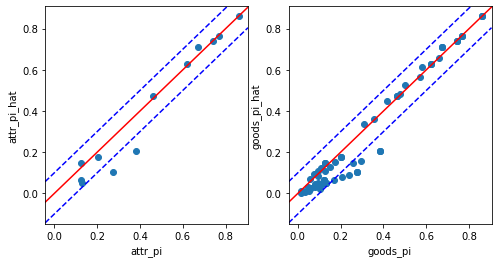

In [16]:
# method='dual_annealing'
mod.fit(method='dual_annealing')
print(mod.theta_hat)
print(mod.init_theta(mod.theta_hat.x,to_goods=False))

mod.score(SimSale=sim_sale,plot=True)

In [17]:
mod.attr_trans

[       A_a    A_b    A_c
 A_a    NaN  113.0  113.0
 A_b  120.0    NaN  120.0
 A_c  117.0  117.0    NaN,
        B_a    B_b    B_c
 B_a    NaN  112.0  112.0
 B_b  120.0    NaN  120.0
 B_c  128.0  128.0    NaN]

(array([0.47888414, 0.10755021, 0.41356565, 0.25997589, 0.35672075,
        0.38330336, 0.59876756, 0.17103894, 0.19463948, 0.75628198,
        0.95257317, 0.94488823, 0.72198998, 0.74108088, 0.19463883,
        0.16032313, 0.78861619, 0.71781641]),
 array([0.47631912, 0.10737173, 0.41630916, 0.26110618, 0.35504121,
        0.38385261, 0.44696074, 0.05049545, 0.0961777 , 0.34935789,
        0.83246195, 0.05555696, 0.05811213, 0.06728485, 0.10085354,
        0.04894338, 0.71064261, 0.06017735]))

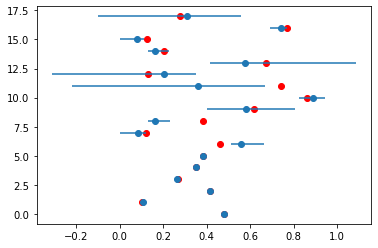

In [18]:
mod.conf_int(SimSale=sim_sale,bootstrap_n=50)